# Making Words-Network

Implement social network for making graph of words connection in the Hoax corpus

In [32]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt

H = nx.Graph()
F = nx.Graph()


## Remove Stopwords + lowercase

### Hoax Corpus

In [33]:
filehoax = open('all_hoax.txt').read()
hoaxlow = filehoax.lower()
open('all_hoax_low.txt', 'w').write(hoaxlow)

import re
string = open('all_hoax_low.txt').read()
new_str = re.sub('[^a-zA-Z\n]', ' ', string)
open('all_hoax_nosym.txt', 'w').write(new_str)

48224

In [34]:
#removing stopwords

f1 = open('all_hoax_nosym.txt', 'r')
f2 = open('/home/adhanindita/tugas-akhir/fnc-id/django_project/hoaxdetector/hoax/lda/stopwords_id.txt', 'r')
f3 = open("all_hoax_stprmvd.txt","w")
first_words=[]
second_words=[]
for line in f1:
    words = line.split()
    for w in words:
        first_words.append(w)

for line in f2:
    w = line.split()
    for i in w:
        second_words.append(i)


for word1 in first_words :
    for word2 in second_words:
        if word1 == word2:
            while True:
                try:
                    first_words.remove(word2)
                except:
                    break
            

for word in first_words:
    f3.write(word)
    f3.write(' ')

f1.close()
f2.close()
f3.close()

  

### Facts Corpus

In [35]:
filefacts = open('all_facts.txt').read()
factslow = filefacts.lower()
open('all_facts_low.txt', 'w').write(factslow)

stringf = open('all_facts_low.txt').read()
new_strf = re.sub('[^a-zA-Z\n]', ' ', stringf)
open('all_facts_nosym.txt', 'w').write(new_strf)

101170

In [36]:
#removing stopwords

f1f = open('all_facts_nosym.txt', 'r')
f2f = open('/home/adhanindita/tugas-akhir/fnc-id/django_project/hoaxdetector/hoax/lda/stopwords_id.txt', 'r')
f3f = open("all_facts_stprmvd.txt","w")
first_wordsf=[]
second_wordsf=[]
for line in f1f:
    words = line.split()
    for w in words:
        first_wordsf.append(w)

for line in f2f:
    w = line.split()
    for i in w:
        second_wordsf.append(i)


for word1 in first_wordsf :
    for word2 in second_wordsf:
        if word1 == word2:
            while True:
                try:
                    first_wordsf.remove(word2)
                except:
                    break
            

for word in first_wordsf:
    f3f.write(word)
    f3f.write(' ')

f1f.close()
f2f.close()
f3f.close()

  

## Remove symbol & number

### Hoax Corpus

### Facts Corpus

## Stemming

### Hoax Corpus

In [37]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

hoax = open('all_hoax_stprmvd.txt').read()
hoax_stemmed = stemmer.stem(hoax)
open('all_hoax_stemmed.txt', 'w').write(hoax_stemmed)

26799

### Facts Corpus

In [38]:
fact = open('all_facts_stprmvd.txt').read()
fact_stemmed = stemmer.stem(fact)
open('all_facts_stemmed.txt', 'w').write(fact_stemmed)

54857

## Add Edges to network

### Hoax

In [39]:
berita = open("all_hoax_stemmed.txt","r").read()

words = berita.split()
i = 0
for idx in range(1, len(words)):
    #print(words[idx-1], words[idx])
    H.add_edge(words[idx-1], words[idx])
    i += 1
print(i)


4259


In [40]:
len(H.edges())

3515

### Facts

In [41]:
beritaf = open("all_facts_stemmed.txt","r").read()

wordsf = beritaf.split()
i = 0
for idx in range(1, len(wordsf)):
    #print(words[idx-1], words[idx])
    F.add_edge(wordsf[idx-1], wordsf[idx])
    i += 1
print(i)


8307


In [42]:
len(F.edges())

6703

## Hoax Analysis

## Draw Graph

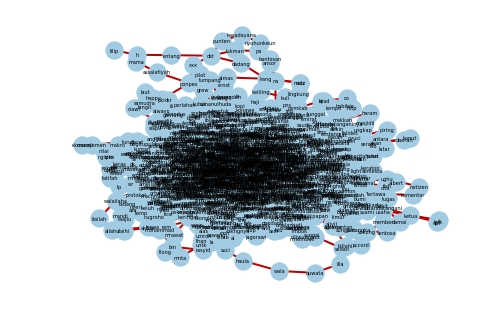

In [43]:
labels = {}

for idx in range(len(words)):
    labels[idx] = words[idx]
    
pos = nx.spring_layout(H)
nx.draw(H,pos,node_color='#A0CBE2',font_size = 5, scale=3, edge_color='#BB0000', width=2, edge_cmap=plt.cm.Blues, with_labels=True)
plt.savefig("hoax_graph.png", dpi=1000)
#nx.draw_networkx_nodes(G, pos)
#nx.draw_networkx_edges(G, pos)
#nx.draw_networkx_labels(G, pos)
#nx.draw(G, with_labels=True, node_size=5, font_size=5, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=10)
#plt.show()

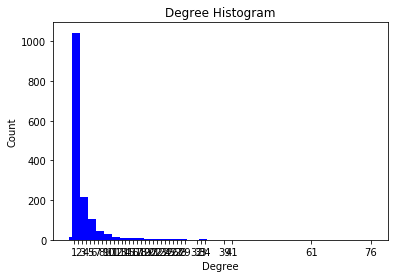

In [44]:
import collections
degree_sequence = sorted([d for n, d in H.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=2, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(H), key=len, reverse=True)[0]
pos = nx.spring_layout(H)
plt.axis('off')
#nx.draw_networkx_nodes(G, pos, node_size=20)
#nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

In [45]:
H.edges()

EdgeView([('ungkap', 'jaring'), ('jaring', 'saracen'), ('jaring', 'libat'), ('saracen', 'berita'), ('saracen', 'foto'), ('saracen', 'anggota'), ('saracen', 'isu'), ('saracen', 'sindikat'), ('berita', 'sedot'), ('berita', 'perhati'), ('berita', 'lidi'), ('berita', 'artikel'), ('berita', 'foto'), ('berita', 'media'), ('berita', 'ranah'), ('berita', 'motor'), ('berita', 'dgn'), ('berita', 'begini'), ('berita', 'jakarta'), ('berita', 'hoax'), ('berita', 'portal'), ('berita', 'online'), ('berita', 'turun'), ('berita', 'heboh'), ('berita', 'alipay'), ('berita', 'jgn'), ('berita', 'gratis'), ('berita', 'muat'), ('berita', 'lengkap'), ('berita', 'it'), ('berita', 'buruk'), ('berita', 'misteri'), ('berita', 'web'), ('berita', 'sebar'), ('berita', 'ingat'), ('berita', 'wib'), ('berita', 'siar'), ('berita', 'teman'), ('berita', 'terus'), ('berita', 'informasi'), ('berita', 'orang'), ('sedot', 'perhati'), ('perhati', 'januari'), ('perhati', 'resah'), ('perhati', 'telantar'), ('perhati', 'warga'), 

In [46]:
len(H.nodes())

1732

In [47]:
import networkx as nx 

g1 = nx.Graph()
g1.add_edges_from([('a', 'b'), ('a','c'), ('b', 'a')])

g1['a']

AtlasView({'b': {}, 'c': {}})

In [48]:
sorted(H.degree(), key = lambda x: int(x[1]), reverse = True)

[('pesan', 76),
 ('orang', 61),
 ('hati', 41),
 ('kirim', 39),
 ('berita', 34),
 ('malam', 34),
 ('anak', 33),
 ('makan', 32),
 ('sebar', 29),
 ('jalan', 29),
 ('warga', 29),
 ('d', 29),
 ('milik', 28),
 ('tinggal', 28),
 ('video', 27),
 ('informasi', 26),
 ('jakarta', 26),
 ('edar', 25),
 ('jam', 25),
 ('teman', 25),
 ('darah', 24),
 ('pagi', 23),
 ('kontak', 23),
 ('bbm', 23),
 ('guna', 22),
 ('indonesia', 22),
 ('nya', 21),
 ('motor', 21),
 ('isi', 21),
 ('jl', 21),
 ('cepat', 20),
 ('tdk', 20),
 ('whatsapp', 20),
 ('broadcast', 20),
 ('facebook', 19),
 ('tolong', 19),
 ('info', 19),
 ('nama', 18),
 ('online', 18),
 ('temu', 18),
 ('cctv', 18),
 ('makam', 18),
 ('perintah', 18),
 ('bukti', 18),
 ('daging', 18),
 ('tulis', 17),
 ('blackberry', 17),
 ('kali', 16),
 ('postingan', 16),
 ('dgn', 16),
 ('umur', 16),
 ('manusia', 16),
 ('besok', 16),
 ('harap', 16),
 ('israel', 16),
 ('menteri', 16),
 ('bakar', 15),
 ('keluarga', 15),
 ('percaya', 15),
 ('dunia', 15),
 ('hidup', 15),
 ('ma

## Degree Centrality

In [49]:
from operator import itemgetter
#degree centrality
deg_cen = nx.degree_centrality(H)

#nx.set_node_attributes(G, 'degree', deg_cen)

sorted_degcen = sorted(deg_cen.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree centrality:")
for b in sorted_degcen[:20]:
    print(b)

Top 20 nodes by degree centrality:
('pesan', 0.043905257076834195)
('orang', 0.035239745811669554)
('hati', 0.02368573079145003)
('kirim', 0.022530329289428074)
('berita', 0.019641825534373193)
('malam', 0.019641825534373193)
('anak', 0.019064124783362217)
('makan', 0.01848642403235124)
('sebar', 0.016753321779318313)
('jalan', 0.016753321779318313)
('warga', 0.016753321779318313)
('d', 0.016753321779318313)
('milik', 0.016175621028307337)
('tinggal', 0.016175621028307337)
('video', 0.015597920277296359)
('informasi', 0.015020219526285383)
('jakarta', 0.015020219526285383)
('edar', 0.014442518775274407)
('jam', 0.014442518775274407)
('teman', 0.014442518775274407)


## Betweenness Centrality 

In [50]:
#betweenness centrality
bet_cen = nx.betweenness_centrality(H)

#nx.set_node_attributes(G, 'degree', deg_cen)

sorted_betcen = sorted(bet_cen.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by betweenness centrality:")
for b in sorted_betcen[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('orang', 0.14320126528830207)
('pesan', 0.12286686795774505)
('hati', 0.07071886534061778)
('kirim', 0.04979654974067915)
('berita', 0.04945811070760601)
('malam', 0.04682147109893482)
('anak', 0.04430852986490454)
('tinggal', 0.04175588729358501)
('milik', 0.04021207761871131)
('jalan', 0.03988365883143871)
('jakarta', 0.0376447646144979)
('warga', 0.037425873600039405)
('sebar', 0.03702962436175143)
('d', 0.0339143572479756)
('jam', 0.03347582927121732)
('makan', 0.03021141262224354)
('teman', 0.029968587427181795)
('video', 0.02948266275456966)
('motor', 0.027135543559396055)
('cepat', 0.02634173455025331)


## Closeness Centrality

In [51]:
#closeness centrality
clo_cen = nx.closeness_centrality(H)

#nx.set_node_attributes(G, 'degree', deg_cen)

sorted_clocen = sorted(clo_cen.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by closeness centrality:")
for b in sorted_clocen[:20]:
    print(b)

Top 20 nodes by closeness centrality:
('orang', 0.3269739327540612)
('pesan', 0.3239146706586826)
('hati', 0.30389747191011235)
('kirim', 0.29844827586206896)
('malam', 0.2980371900826446)
('sebar', 0.29483903934593764)
('berita', 0.2947888283378747)
('teman', 0.29269529928982074)
('jalan', 0.29014415018437817)
('jam', 0.28797205123939446)
('broadcast', 0.28677932405566603)
('tinggal', 0.2861157024793388)
('jakarta', 0.2859738972410375)
('video', 0.28573786728293166)
('milik', 0.28470394736842103)
('tulis', 0.281554977228367)
('warga', 0.2812804679883003)
('perintah', 0.28068753040376193)
('anak', 0.2799611838913149)
('kontak', 0.27964458804523423)


In [52]:
nx.write_gexf(H, "hoax_test.gexf")

In [53]:
H['pesan']

AtlasView({'facebook': {}, 'beranta': {}, 'jantung': {}, 'ramadhan': {}, 'edar': {}, 'bunyi': {}, 'layan': {}, 'singkat': {}, 'bintik': {}, 'isi': {}, 'temu': {}, 'muncul': {}, 'bandung': {}, 'besar': {}, 'lokasi': {}, 'angkot': {}, 'kaleng': {}, 'sebut': {}, 'nuhun': {}, 'bpk': {}, 'aplikasi': {}, 'instan': {}, 'dekat': {}, 'peristiwa': {}, 'guna': {}, 'hati': {}, 'sebar': {}, 'pesan': {}, 'satu': {}, 'malam': {}, 'teman': {}, 'publikasi': {}, 'perintah': {}, 'broadcast': {}, 'bener': {}, 'tri': {}, 'detikcom': {}, 'cina': {}, 'whatsapp': {}, 'kombes': {}, 'buat': {}, 'kait': {}, 'terima': {}, 'video': {}, 'jam': {}, 'percaya': {}, 'bukti': {}, 'nenek': {}, 'abai': {}, 'kirim': {}, 'per': {}, 'message': {}, 'org': {}, 'tsb': {}, 'beritahu': {}, 'terus': {}, 'apa': {}, 'contact': {}, 'membroadcast': {}, 'refresh': {}, 'rebut': {}, 'ulang': {}, 'orang': {}, 'kontak': {}, 'siar': {}, 'blackberry': {}, 'bagi': {}, 'uang': {}, 'cari': {}, 'asli': {}, 'maya': {}, 'ajaib': {}, 'minimal': {},

## Facts Analysis

## Draw Graph - Facts

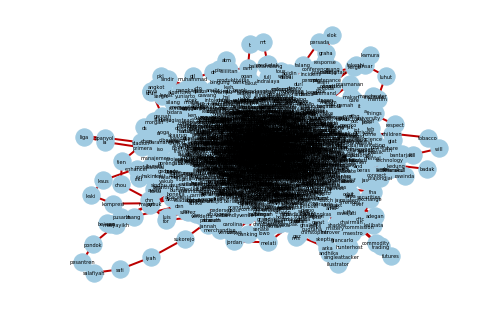

In [54]:
labels = {}

for idx in range(len(wordsf)):
    labels[idx] = wordsf[idx]
    
pos = nx.spring_layout(F)
nx.draw(F,pos,node_color='#A0CBE2',font_size = 5, scale=3, edge_color='#BB0000', width=2, edge_cmap=plt.cm.Blues, with_labels=True)
plt.savefig("fact_graph.png", dpi=1000)
#nx.draw_networkx_nodes(G, pos)
#nx.draw_networkx_edges(G, pos)
#nx.draw_networkx_labels(G, pos)
#nx.draw(G, with_labels=True, node_size=5, font_size=5, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=10)
#plt.show()

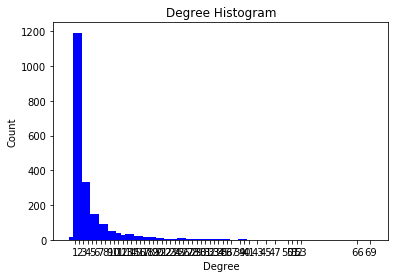

In [55]:
import collections
degree_sequence = sorted([d for n, d in F.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=2, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(F), key=len, reverse=True)[0]
pos = nx.spring_layout(F)
plt.axis('off')
#nx.draw_networkx_nodes(G, pos, node_size=20)
#nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

In [56]:
F.edges()

EdgeView([('berita', 'banjir'), ('banjir', 'pagarsih'), ('banjir', 'citarum'), ('banjir', 'bunyi'), ('banjir', 'cipinang'), ('banjir', 'genang'), ('banjir', 'terima'), ('banjir', 'kirim'), ('pagarsih', 'bandung'), ('bandung', 'edar'), ('bandung', 'solobalapan'), ('bandung', 'ka'), ('bandung', 'resmi'), ('bandung', 'tutup'), ('bandung', 'hotel'), ('bandung', 'acara'), ('bandung', 'barudak'), ('bandung', 'gelar'), ('bandung', 'kota'), ('bandung', 'ceo'), ('bandung', 'sukses'), ('bandung', 'event'), ('bandung', 'yogyakarta'), ('bandung', 'orang'), ('edar', 'surat'), ('edar', 'aplikasi'), ('edar', 'paru'), ('edar', 'luas'), ('edar', 'kolase'), ('edar', 'sebar'), ('edar', 'situs'), ('edar', 'foto'), ('edar', 'rakyat'), ('edar', 'pesan'), ('edar', 'beranta'), ('edar', 'media'), ('edar', 'dki'), ('edar', 'senin'), ('edar', 'orang'), ('edar', 'narkoba'), ('edar', 'ungkap'), ('edar', 'antisipasi'), ('edar', 'akun'), ('edar', 'pasar'), ('surat', 'warga'), ('surat', 'meter'), ('surat', 'kop'), ('

In [57]:
len(F.nodes())

2507

In [58]:
sorted(F.degree(), key = lambda x: int(x[1]), reverse = True)

[('indonesia', 69),
 ('jakarta', 66),
 ('golkar', 53),
 ('orang', 52),
 ('milik', 51),
 ('jalan', 50),
 ('atur', 47),
 ('jokowi', 45),
 ('shopee', 43),
 ('informasi', 41),
 ('senin', 40),
 ('serang', 40),
 ('gelar', 39),
 ('nomor', 37),
 ('tambah', 36),
 ('sandiaga', 36),
 ('hadir', 35),
 ('warga', 34),
 ('kait', 34),
 ('kartu', 33),
 ('rencana', 33),
 ('presiden', 33),
 ('usaha', 33),
 ('aman', 32),
 ('terang', 32),
 ('akun', 32),
 ('kembang', 32),
 ('salah', 31),
 ('tahan', 31),
 ('juta', 31),
 ('dasar', 31),
 ('hubung', 30),
 ('masyarakat', 30),
 ('data', 30),
 ('perintah', 30),
 ('alias', 30),
 ('ribu', 29),
 ('sangka', 29),
 ('hasil', 29),
 ('aku', 28),
 ('kali', 28),
 ('menteri', 27),
 ('kpk', 27),
 ('tugas', 27),
 ('air', 26),
 ('kondisi', 26),
 ('tinggal', 26),
 ('beli', 26),
 ('nama', 26),
 ('uang', 26),
 ('id', 26),
 ('ka', 26),
 ('facebook', 25),
 ('laku', 25),
 ('kelola', 25),
 ('jual', 25),
 ('surat', 24),
 ('tingkat', 24),
 ('rumah', 24),
 ('rp', 24),
 ('selasa', 24),
 ('

## Degree Centrality - facts

In [59]:
from operator import itemgetter
#degree centrality
deg_cen = nx.degree_centrality(F)

#nx.set_node_attributes(G, 'degree', deg_cen)

sorted_degcen = sorted(deg_cen.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree centrality:")
for b in sorted_degcen[:20]:
    print(b)

Top 20 nodes by degree centrality:
('indonesia', 0.02753391859537111)
('jakarta', 0.026336791699920193)
('golkar', 0.02114924181963288)
('orang', 0.020750199521149242)
('milik', 0.020351157222665603)
('jalan', 0.019952114924181964)
('atur', 0.018754988028731046)
('jokowi', 0.017956903431763767)
('shopee', 0.017158818834796488)
('informasi', 0.01636073423782921)
('senin', 0.01596169193934557)
('serang', 0.01596169193934557)
('gelar', 0.015562649640861933)
('nomor', 0.014764565043894654)
('tambah', 0.014365522745411015)
('sandiaga', 0.014365522745411015)
('hadir', 0.013966480446927375)
('warga', 0.013567438148443736)
('kait', 0.013567438148443736)
('kartu', 0.013168395849960097)


## Betweenness Centrality - facts 

In [60]:
#betweenness centrality
bet_cen = nx.betweenness_centrality(F)

#nx.set_node_attributes(G, 'degree', deg_cen)

sorted_betcen = sorted(bet_cen.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by betweenness centrality:")
for b in sorted_betcen[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('indonesia', 0.06730063825859034)
('jakarta', 0.05102514159786874)
('jalan', 0.04108401902760723)
('milik', 0.03933845462449282)
('golkar', 0.032512480505141786)
('orang', 0.032390265773117294)
('senin', 0.03154130955549027)
('informasi', 0.03135851346580055)
('atur', 0.02838717838113109)
('gelar', 0.02655649223493782)
('serang', 0.02535833274323528)
('shopee', 0.024249568595756218)
('nomor', 0.023257379259607292)
('jokowi', 0.02292280406713602)
('presiden', 0.020468309697243853)
('akun', 0.02026751907408746)
('salah', 0.019776969423236875)
('kartu', 0.01937801085176363)
('hadir', 0.01931945167293484)
('aman', 0.019114721648381548)


## Closeness Centrality - facts

In [61]:
#closeness centrality
clo_cen = nx.closeness_centrality(F)

#nx.set_node_attributes(G, 'degree', deg_cen)

sorted_clocen = sorted(clo_cen.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by closeness centrality:")
for b in sorted_clocen[:20]:
    print(b)

Top 20 nodes by closeness centrality:
('indonesia', 0.3279675435152467)
('milik', 0.3231046931407942)
('jakarta', 0.3206653870761356)
('informasi', 0.31665403083143795)
('senin', 0.3141531904224646)
('orang', 0.31383844708829056)
('atur', 0.31045589692765113)
('salah', 0.3088869715271786)
('nomor', 0.30771119842829076)
('jalan', 0.3062820826203862)
('rencana', 0.30572160546541416)
('dasar', 0.30553523530846133)
('jokowi', 0.3046808510638298)
('akun', 0.3038680732387535)
('gelar', 0.3029130907772271)
('shopee', 0.30240135151442016)
('kait', 0.30181861977598456)
('terang', 0.3008764557569936)
('juta', 0.30033557046979864)
('serang', 0.30022762669222475)


In [62]:
nx.write_gexf(F, "fact_test.gexf")